# k-Nearest Neighbors (kNN) Algorithm Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [4]:
# import the iris data
iris = datasets.load_iris()

# Only use the first two features: sepal length, sepal width
X = iris.data[:, :2]

# Vector of labels
y = iris.target

In [5]:
# generate mesh
h = .02  # step size in the mesh
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))

In [6]:
# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

In [8]:
# number of neighbors
k_neighbors = 15

# kNN classifiers
clf = neighbors.KNeighborsClassifier(k_neighbors)

# fitting data
clf.fit(X, y)

# checking point
q = np.c_[xx1.ravel(), xx2.ravel()];

# prediction
y_predict = clf.predict(q)

# reshape
y_predict = y_predict.reshape(xx1.shape)

<ipython-input-9-6f63969f393a>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],


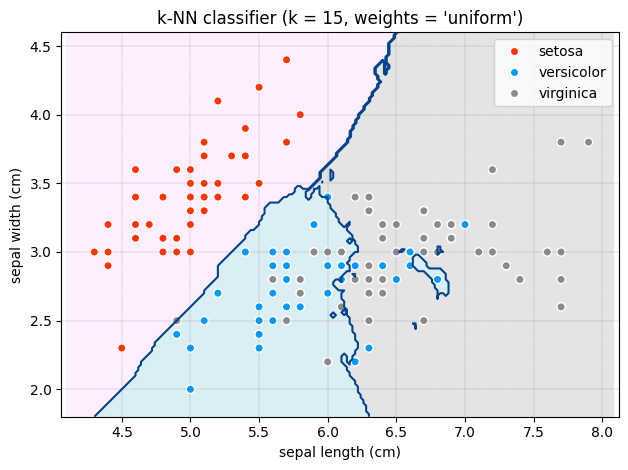

In [9]:
# visualization
fig, ax = plt.subplots()

# plot decision regions
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)

# plot decision boundaries
plt.contour(xx1, xx2, y_predict, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

# Plot data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0,
                linewidth = 1, edgecolor=[1,1,1])

# Figure decorations
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("k-NN classifier (k = %i, weights = 'uniform')"
          % (k_neighbors))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.tight_layout()
plt.axis('equal')
plt.show()